In [1]:
import os
import torch
import torchvision
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim

import torchvision.transforms as tfms
import torchvision.datasets as dsets
import matplotlib.pyplot as plt
import numpy as np

C:\Users\201910810\Anaconda3\lib\site-packages\torchvision\io\image.py:11: UserWarning: Failed to load image Python extension: Could not find module 'C:\Users\201910810\Anaconda3\Lib\site-packages\torchvision\image.pyd' (or one of its dependencies). Try using the full path with constructor syntax.
  warn(f"Failed to load image Python extension: {e}")


### maxout

In [2]:
class Maxout(nn.Module):
    def __init__(self, in_features, out_features, num_pieces):
        super(Maxout, self).__init__()

        self.in_features = in_features
        self.out_features = out_features
        self.num_pieces = num_pieces

        self.lin = nn.Linear(in_features, out_features * num_pieces)

    def forward(self, x):
        lin = self.lin(x)
        y = lin.view(-1, self.num_pieces, self.out_features).max(dim=1)[0]
        return y### maxout

In [3]:
EPOCHS = 100
BATCH_SIZE = 100
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(device)

cuda


In [4]:
# trainset = dsets.FashionMNIST(
#     root='./data/', 
#     train=True, 
#     transform=tfms.Compose([
#         tfms.ToTensor(),
#         tfms.Normalize([0.5,], [0.5,])
#     ]),
#     download=True
# )
trainset = dsets.MNIST(
    root='./data/', 
    train=True, 
    transform=tfms.Compose([
        tfms.ToTensor(),
        tfms.Normalize([0.5,], [0.5,])
    ]),
    download=True
)

In [5]:
data_loader = torch.utils.data.DataLoader(
    dataset = trainset,
    batch_size = BATCH_SIZE, 
    shuffle = True
)

In [6]:
class Generator(nn.Module):
    def __init__(self):
        super(Generator, self).__init__()
        
        self.embed = nn.Embedding(10, 10)
        self.model = nn.Sequential(
            nn.Linear(110, 256),
            nn.LeakyReLU(0.2, True),
            nn.Linear(256, 512),
            nn.LeakyReLU(0.2, True),
            nn.Linear(512, 1024),
            nn.LeakyReLU(0.2, True),
            nn.Linear(1024, 784),
            nn.Tanh()
        )
        
    def forward(self, z, labels):
        c = self.embed(labels)
        x = torch.cat([z, c], 1)
        return self.model(x)

In [7]:
# class Discriminator(nn.Module):
#     def __init__(self):
#         super(Discriminator, self).__init__()
#         self.embed = nn.Embedding(10, 10)
        
#         self.y_max = nn.Sequential(
#             Maxout(10, 50, 5),
#             # nn.Dropout(0.8)
#         )
#         self.x_max = nn.Sequential(
#             Maxout(784, 240, 5),
#             nn.Dropout(0.8)
#         )
        
#         self.model = nn.Sequential(
#             Maxout(290, 240, 4),
#             nn.Linear(240, 1),
#             nn.Sigmoid()
#         )
    
#     def forward(self, x, label):
#         c = self.embed(label)
#         x_m = self.x_max(x)
#         y_m = self.y_max(c)
#         x = torch.cat([x_m, y_m], dim=1)
#         return self.model(x)

In [7]:
class Discriminator(nn.Module):
    def __init__(self):
        super(Discriminator, self).__init__()
        self.embed = nn.Embedding(10, 10)
        
        self.model = nn.Sequential(
            nn.Linear(794, 1024),
            nn.LeakyReLU(0.2, True),
            nn.Dropout(0.3),
            nn.Linear(1024, 512),
            nn.LeakyReLU(0.2, True),
            nn.Dropout(0.3),
            nn.Linear(512, 256),
            nn.LeakyReLU(0.2, True),
            nn.Dropout(0.3),
            nn.Linear(256, 1),
            nn.Sigmoid()
        )
    
    def forward(self, x, label):
        c = self.embed(label)
        x = torch.cat([x, c], dim=1)
        return self.model(x)

In [8]:
D = Discriminator().to(device)
G = Generator().to(device)

criterion = nn.BCELoss()
d_optim = optim.Adam(D.parameters(), lr=0.0002)
g_optim = optim.Adam(G.parameters(), lr=0.0002)

C:\Users\201910810\Anaconda3\lib\site-packages\torch\cuda\__init__.py:143: UserWarning: 
NVIDIA GeForce RTX 3060 with CUDA capability sm_86 is not compatible with the current PyTorch installation.
The current PyTorch install supports CUDA capabilities sm_37 sm_50 sm_60 sm_61 sm_70 sm_75 compute_37.
If you want to use the NVIDIA GeForce RTX 3060 GPU with PyTorch, please check the instructions at https://pytorch.org/get-started/locally/

  warnings.warn(incompatible_device_warn.format(device_name, capability, " ".join(arch_list), device_name))


In [9]:
nums = [x for x in range(10)]
test_nums = []
for i in range(10):
    test_nums += nums
plot_label = torch.tensor(test_nums, dtype=torch.long).to(device)

Epoch [  0|100]    Loss [D:0.955100 | G:1.197139]    [D(x)  0.580882| D(G(z)) 0.328683]


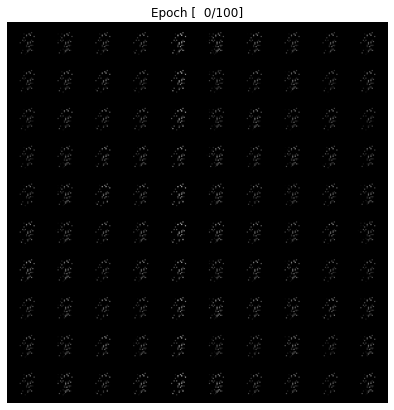

Epoch [  1|100]    Loss [D:0.576402 | G:4.262037]    [D(x)  0.841285| D(G(z)) 0.215559]
Epoch [  2|100]    Loss [D:1.555075 | G:0.700754]    [D(x)  0.614515| D(G(z)) 0.561555]
Epoch [  3|100]    Loss [D:0.443444 | G:2.240297]    [D(x)  0.889864| D(G(z)) 0.198208]
Epoch [  4|100]    Loss [D:0.190745 | G:4.063097]    [D(x)  0.922568| D(G(z)) 0.052956]
Epoch [  5|100]    Loss [D:0.414648 | G:3.734728]    [D(x)  0.909042| D(G(z)) 0.118772]
Epoch [  6|100]    Loss [D:0.682260 | G:2.694607]    [D(x)  0.811752| D(G(z)) 0.234862]
Epoch [  7|100]    Loss [D:0.802728 | G:2.724626]    [D(x)  0.830673| D(G(z)) 0.287082]
Epoch [  8|100]    Loss [D:0.591996 | G:2.969318]    [D(x)  0.800291| D(G(z)) 0.116180]
Epoch [  9|100]    Loss [D:0.452017 | G:3.265812]    [D(x)  0.847296| D(G(z)) 0.124912]
Epoch [ 10|100]    Loss [D:0.578930 | G:3.053388]    [D(x)  0.831249| D(G(z)) 0.181084]
Epoch [ 11|100]    Loss [D:0.670271 | G:2.632879]    [D(x)  0.830896| D(G(z)) 0.224660]
Epoch [ 12|100]    Loss [D:0.570

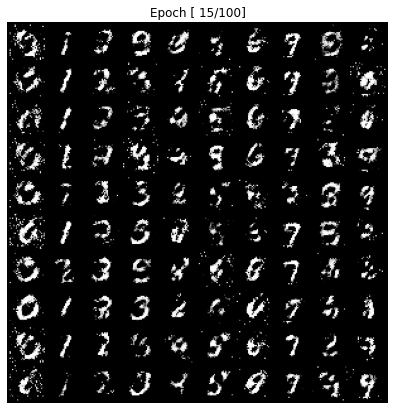

Epoch [ 16|100]    Loss [D:0.943794 | G:1.470731]    [D(x)  0.873913| D(G(z)) 0.431294]
Epoch [ 17|100]    Loss [D:0.542275 | G:2.139292]    [D(x)  0.870703| D(G(z)) 0.257264]
Epoch [ 18|100]    Loss [D:0.752746 | G:1.999213]    [D(x)  0.773994| D(G(z)) 0.270091]
Epoch [ 19|100]    Loss [D:0.827865 | G:1.755539]    [D(x)  0.739710| D(G(z)) 0.292392]
Epoch [ 20|100]    Loss [D:0.951057 | G:1.239332]    [D(x)  0.727704| D(G(z)) 0.340775]
Epoch [ 21|100]    Loss [D:0.933408 | G:1.317502]    [D(x)  0.744599| D(G(z)) 0.371458]
Epoch [ 22|100]    Loss [D:0.870791 | G:2.150028]    [D(x)  0.718750| D(G(z)) 0.257290]
Epoch [ 23|100]    Loss [D:0.959431 | G:1.391555]    [D(x)  0.711851| D(G(z)) 0.327758]
Epoch [ 24|100]    Loss [D:1.234292 | G:1.333863]    [D(x)  0.649670| D(G(z)) 0.430719]
Epoch [ 25|100]    Loss [D:0.900404 | G:1.690084]    [D(x)  0.694419| D(G(z)) 0.259154]
Epoch [ 26|100]    Loss [D:1.013147 | G:1.278141]    [D(x)  0.710540| D(G(z)) 0.385093]
Epoch [ 27|100]    Loss [D:1.141

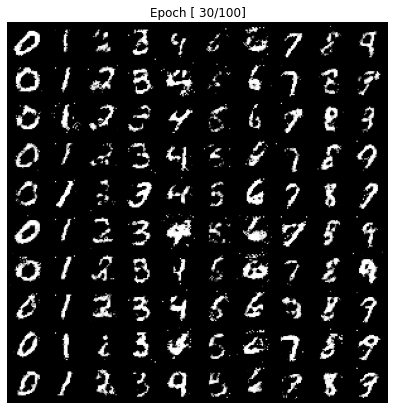

Epoch [ 31|100]    Loss [D:0.934795 | G:1.565038]    [D(x)  0.735646| D(G(z)) 0.342208]
Epoch [ 32|100]    Loss [D:1.255327 | G:0.882107]    [D(x)  0.607624| D(G(z)) 0.421009]
Epoch [ 33|100]    Loss [D:0.979413 | G:1.616773]    [D(x)  0.758049| D(G(z)) 0.398639]
Epoch [ 34|100]    Loss [D:1.198595 | G:1.006056]    [D(x)  0.612018| D(G(z)) 0.425654]
Epoch [ 35|100]    Loss [D:1.002011 | G:1.532816]    [D(x)  0.623269| D(G(z)) 0.303588]
Epoch [ 36|100]    Loss [D:1.195626 | G:1.095418]    [D(x)  0.569018| D(G(z)) 0.353718]
Epoch [ 37|100]    Loss [D:1.174582 | G:1.303479]    [D(x)  0.627170| D(G(z)) 0.394871]
Epoch [ 38|100]    Loss [D:1.255946 | G:0.874051]    [D(x)  0.559224| D(G(z)) 0.410286]
Epoch [ 39|100]    Loss [D:1.025760 | G:1.630546]    [D(x)  0.600591| D(G(z)) 0.283642]
Epoch [ 40|100]    Loss [D:1.158625 | G:1.135042]    [D(x)  0.566915| D(G(z)) 0.362788]
Epoch [ 41|100]    Loss [D:1.213400 | G:0.861593]    [D(x)  0.622916| D(G(z)) 0.467862]
Epoch [ 42|100]    Loss [D:1.173

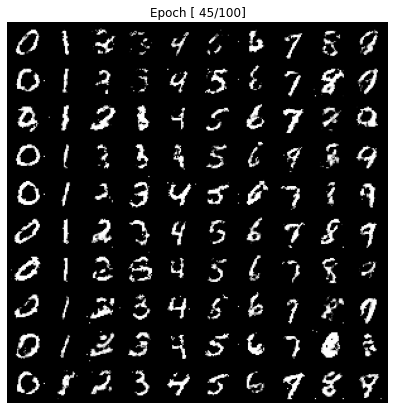

Epoch [ 46|100]    Loss [D:1.090466 | G:1.243085]    [D(x)  0.627867| D(G(z)) 0.369433]
Epoch [ 47|100]    Loss [D:1.066649 | G:1.247462]    [D(x)  0.607651| D(G(z)) 0.357594]
Epoch [ 48|100]    Loss [D:1.154745 | G:1.020699]    [D(x)  0.598677| D(G(z)) 0.411456]
Epoch [ 49|100]    Loss [D:1.153729 | G:1.164842]    [D(x)  0.583840| D(G(z)) 0.356921]
Epoch [ 50|100]    Loss [D:1.201879 | G:0.998748]    [D(x)  0.602636| D(G(z)) 0.434999]
Epoch [ 51|100]    Loss [D:1.138280 | G:1.026483]    [D(x)  0.630623| D(G(z)) 0.418892]
Epoch [ 52|100]    Loss [D:1.114641 | G:0.941221]    [D(x)  0.624311| D(G(z)) 0.410770]
Epoch [ 53|100]    Loss [D:1.137942 | G:1.130717]    [D(x)  0.606525| D(G(z)) 0.390151]
Epoch [ 54|100]    Loss [D:1.207051 | G:0.919160]    [D(x)  0.582943| D(G(z)) 0.433251]
Epoch [ 55|100]    Loss [D:1.238243 | G:1.115165]    [D(x)  0.544405| D(G(z)) 0.391010]
Epoch [ 56|100]    Loss [D:1.171544 | G:1.020091]    [D(x)  0.576507| D(G(z)) 0.396951]
Epoch [ 57|100]    Loss [D:1.140

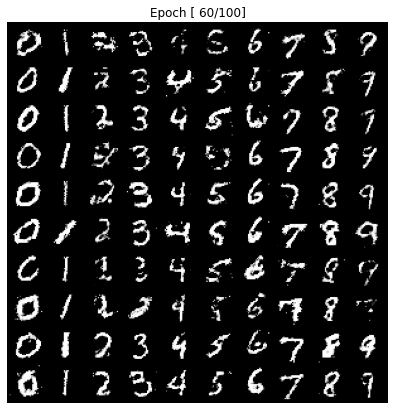

Epoch [ 61|100]    Loss [D:1.335611 | G:0.795763]    [D(x)  0.599187| D(G(z)) 0.490080]
Epoch [ 62|100]    Loss [D:1.119104 | G:1.033025]    [D(x)  0.613436| D(G(z)) 0.395732]
Epoch [ 63|100]    Loss [D:1.205754 | G:0.868342]    [D(x)  0.564464| D(G(z)) 0.419585]
Epoch [ 64|100]    Loss [D:1.221695 | G:0.962385]    [D(x)  0.563201| D(G(z)) 0.413065]
Epoch [ 65|100]    Loss [D:1.142650 | G:0.898584]    [D(x)  0.646816| D(G(z)) 0.458601]
Epoch [ 66|100]    Loss [D:1.245593 | G:0.938571]    [D(x)  0.551319| D(G(z)) 0.422756]
Epoch [ 67|100]    Loss [D:1.226769 | G:0.859299]    [D(x)  0.586296| D(G(z)) 0.445478]
Epoch [ 68|100]    Loss [D:1.247009 | G:0.919442]    [D(x)  0.563737| D(G(z)) 0.445364]
Epoch [ 69|100]    Loss [D:1.250506 | G:0.772204]    [D(x)  0.572311| D(G(z)) 0.466315]
Epoch [ 70|100]    Loss [D:1.224230 | G:0.883934]    [D(x)  0.577164| D(G(z)) 0.445548]
Epoch [ 71|100]    Loss [D:1.237584 | G:0.898547]    [D(x)  0.574029| D(G(z)) 0.452018]
Epoch [ 72|100]    Loss [D:1.126

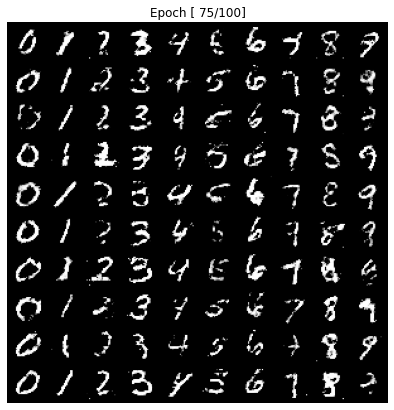

Epoch [ 76|100]    Loss [D:1.174450 | G:0.842481]    [D(x)  0.593184| D(G(z)) 0.444248]
Epoch [ 77|100]    Loss [D:1.280096 | G:0.795893]    [D(x)  0.533253| D(G(z)) 0.460052]
Epoch [ 78|100]    Loss [D:1.446341 | G:0.891184]    [D(x)  0.457365| D(G(z)) 0.436332]
Epoch [ 79|100]    Loss [D:1.275689 | G:0.926919]    [D(x)  0.523127| D(G(z)) 0.420435]
Epoch [ 80|100]    Loss [D:1.257182 | G:0.809623]    [D(x)  0.572396| D(G(z)) 0.467445]
Epoch [ 81|100]    Loss [D:1.294487 | G:0.847169]    [D(x)  0.576626| D(G(z)) 0.453405]
Epoch [ 82|100]    Loss [D:1.168267 | G:0.945697]    [D(x)  0.632300| D(G(z)) 0.433049]
Epoch [ 83|100]    Loss [D:1.181117 | G:0.861024]    [D(x)  0.602142| D(G(z)) 0.452282]
Epoch [ 84|100]    Loss [D:1.318743 | G:1.004789]    [D(x)  0.492624| D(G(z)) 0.395752]
Epoch [ 85|100]    Loss [D:1.286239 | G:1.326900]    [D(x)  0.496604| D(G(z)) 0.320701]
Epoch [ 86|100]    Loss [D:1.257392 | G:0.849808]    [D(x)  0.541957| D(G(z)) 0.428657]
Epoch [ 87|100]    Loss [D:1.232

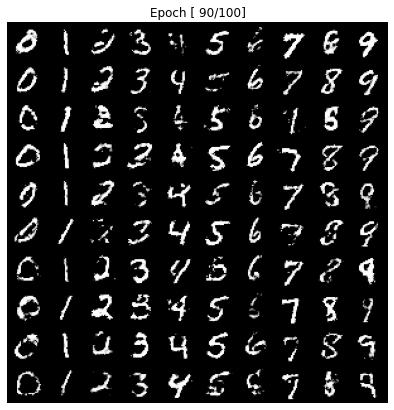

Epoch [ 91|100]    Loss [D:1.334597 | G:0.822197]    [D(x)  0.563302| D(G(z)) 0.464614]
Epoch [ 92|100]    Loss [D:1.377988 | G:0.749611]    [D(x)  0.531435| D(G(z)) 0.492957]
Epoch [ 93|100]    Loss [D:1.428565 | G:0.831796]    [D(x)  0.504165| D(G(z)) 0.469044]
Epoch [ 94|100]    Loss [D:1.297795 | G:0.783569]    [D(x)  0.542664| D(G(z)) 0.469399]
Epoch [ 95|100]    Loss [D:1.185987 | G:0.966129]    [D(x)  0.548091| D(G(z)) 0.397048]
Epoch [ 96|100]    Loss [D:1.259093 | G:0.790938]    [D(x)  0.557436| D(G(z)) 0.471770]
Epoch [ 97|100]    Loss [D:1.336751 | G:0.855199]    [D(x)  0.519438| D(G(z)) 0.457490]
Epoch [ 98|100]    Loss [D:1.312573 | G:0.812118]    [D(x)  0.552210| D(G(z)) 0.470185]
Epoch [ 99|100]    Loss [D:1.284863 | G:0.986717]    [D(x)  0.540047| D(G(z)) 0.423602]
Epoch [100|100]    Loss [D:1.373196 | G:1.043837]    [D(x)  0.502042| D(G(z)) 0.419830]


In [11]:
total_step = len(data_loader)

plt.ion()

for epoch in range(EPOCHS+1):
    for i, (images, labels) in enumerate(data_loader): #100개씩 600번
        images = images.reshape(BATCH_SIZE, -1).to(device) # 100, 1. 28, 28 크기를 100 784로 바꿔줌
        
        real_labels = torch.ones(BATCH_SIZE, 1).to(device)
        fake_labels = torch.zeros(BATCH_SIZE, 1).to(device)
        
        # discriminator 먼저 학습
        labels = labels.to(device) # 100
        outputs = D(images, labels) # (100, 784)  (100)
        d_loss_real = criterion(outputs, real_labels) # BCELoss real image와 real labels로 1이 나오게 loss구함
        real_score = outputs
        
        z = torch.randn(BATCH_SIZE, 100).to(device) # 100 100 gausian noise
        g_label = torch.randint(0, 10, (BATCH_SIZE, )).to(device) #0 ~ 10 100 
        fake_images = G(z, g_label) # ganerate fake image 
        fake_image = fake_images.detach()
        
        outputs = D(fake_image, g_label) #fake discriminate random num, 그걸로 만든 fake image
        d_loss_fake = criterion(outputs, fake_labels)#fake loss
        fake_score = outputs
        
        d_loss = d_loss_real + d_loss_fake #loss 합
        
        d_optim.zero_grad()
        d_loss.backward()
        d_optim.step() #학습
        
        # generator 학습
        #fake_images = G(z, g_label)
        #fake_images = fake_image.detach()
        otuptus = D(fake_images, g_label)
        g_loss = criterion(otuptus, real_labels)
        
        g_optim.zero_grad()
        g_loss.backward()
        g_optim.step()  
        
    print("Epoch [{:3d}|{:3d}]    Loss [D:{:8.6f} | G:{:8.6f}]    [D(x)  {:8.6f}| D(G(z)) {:8.6f}]".format(
        epoch, EPOCHS, d_loss.item(), g_loss.item(), real_score.mean().item(), fake_score.mean().item()
    ))
    
    #15에폭마다 1~ 10 10개 그리기
    if epoch % 15 == 0:
        z = torch.randn(100, 100).to(device)
        sample_imgs = G(z, plot_label)
        sample_imgs = sample_imgs.reshape((100, 1, 28, 28))
        sample_imgs = torchvision.utils.make_grid(sample_imgs, nrow=10)
        plot_imgs   = np.clip(sample_imgs.data.cpu().numpy().transpose(1, 2, 0), 0, 1)

        plt.figure(figsize=(7, 7))
        plt.imshow(plot_imgs)
        plt.title("Epoch [{:3d}/{:3d}]".format(epoch, EPOCHS))
        plt.axis('off')
        plt.pause(0.001)
        
        torchvision.utils.save_image(sample_imgs, "./results/Epoch_{:3d}.png".format(epoch))
plt.ioff()

In [ ]:
detach